### House Price Prediction

In [1]:
import pandas as pd
import torch
import torch.nn as nn

Importing the Boston Housing Database

In [2]:
df = pd.read_csv("BostonHousing.csv")
df.head()

,crime,landzone,indus,chas,nox,room,age,distance,rad,tax,ptratio,b,lstatus,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
x = df.drop('price', axis=1)
y = df['price']

In [4]:
x = x.values
y = y.values

Scaling the database to to equaily fit every features 

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)  # Scaling features

In [6]:
X_scaled = torch.tensor(X_scaled, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)  

Splitting the database for training and testing the models

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
type(x), type(y), type(X_scaled),type(y_train)

(numpy.ndarray, torch.Tensor, torch.Tensor, torch.Tensor)

#### Visualize the dataset

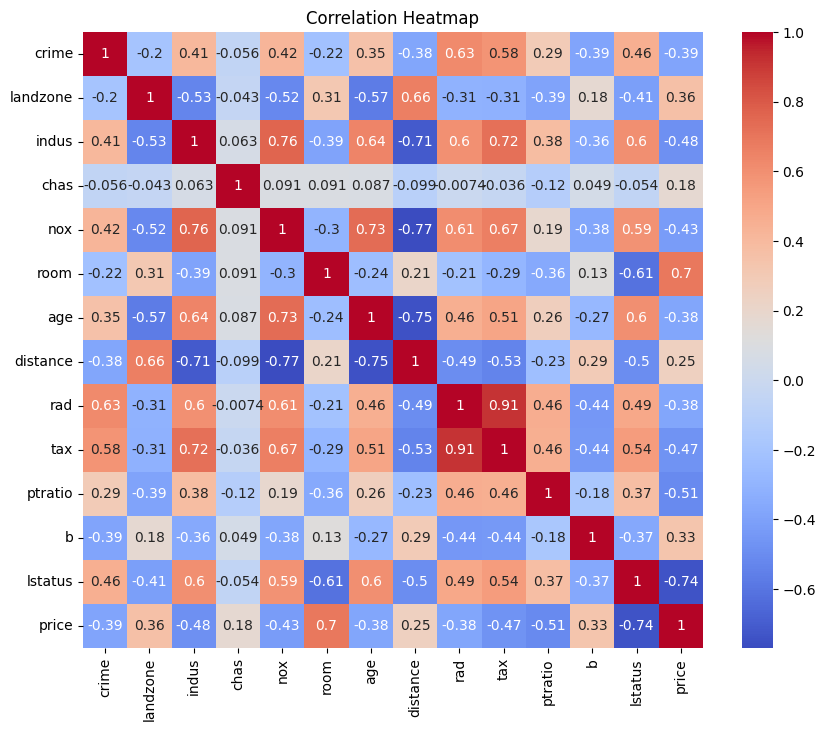

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

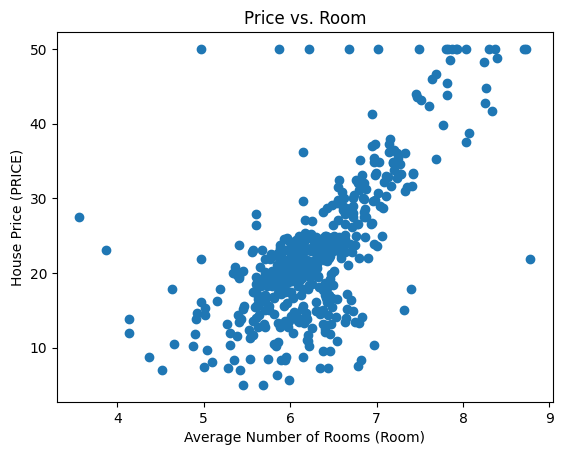

In [10]:
# Scatter plot of RM (average number of rooms per dwelling) vs PRICE
plt.scatter(df['room'], df['price'])
plt.xlabel('Average Number of Rooms (Room)')
plt.ylabel('House Price (PRICE)')
plt.title('Price vs. Room')
plt.show()

Text(0.5, 1.0, 'Price vs Population Status')

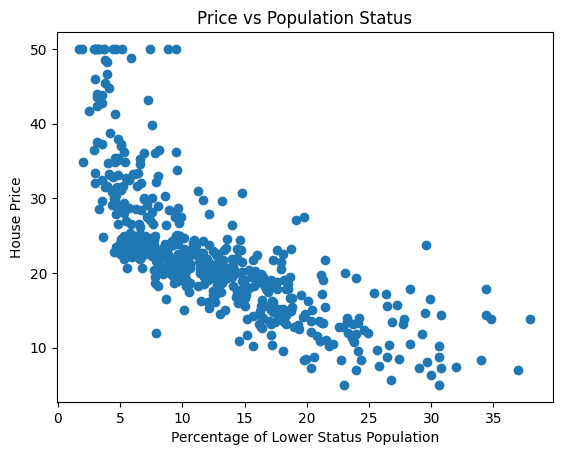

In [11]:
# scatter plot of lstat vs price
plt.scatter(df['lstatus'], df['price'])
plt.xlabel('Percentage of Lower Status Population')
plt.ylabel('House Price')
plt.title('Price vs Population Status')

#### Building a Linear Regression Model

In [12]:
import torch.nn as nn

# Define a simple Linear Regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # 1 output, since we are predicting house price
        
    def forward(self, x):
        return self.linear(x)

# Initialize the model
input_dim = X_train.shape[1]
model = LinearRegressionModel(input_dim)

# Loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

#### Building a neural network

In [13]:
class NeuralNet(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, 1)  # 1 output (price prediction)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize the model
model_nn = NeuralNet(input_dim=input_dim, hidden_dim=64)  # e.g., 64 hidden units
optimizer_nn = torch.optim.Adam(model_nn.parameters(), lr=0.001)

#### Training the Linear model

In [14]:
# Train the Linear Regression Model
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    
    # Forward pass: Compute prediction
    y_pred_train = model(X_train)
    
    # Compute loss
    loss = criterion(y_pred_train, y_train)
    
    # Backward pass: Compute gradient and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 32.9316
Epoch [200/1000], Loss: 22.8085
Epoch [300/1000], Loss: 22.2160
Epoch [400/1000], Loss: 21.9928
Epoch [500/1000], Loss: 21.8697
Epoch [600/1000], Loss: 21.7970
Epoch [700/1000], Loss: 21.7517
Epoch [800/1000], Loss: 21.7220
Epoch [900/1000], Loss: 21.7015
Epoch [1000/1000], Loss: 21.6870


#### Training the neural network model

In [15]:
# Train the Neural Network Model
num_epochs = 1000
for epoch in range(num_epochs):
    model_nn.train()
    
    # Forward pass: Compute prediction
    y_pred_train = model_nn(X_train)
    
    # Compute loss
    loss = criterion(y_pred_train, y_train)
    
    # Backward pass: Compute gradient and update the weights
    optimizer_nn.zero_grad()
    loss.backward()
    optimizer_nn.step()
    
    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], NN Loss: {loss.item():.4f}')

Epoch [100/1000], NN Loss: 429.5895
Epoch [200/1000], NN Loss: 151.9993
Epoch [300/1000], NN Loss: 53.5065
Epoch [400/1000], NN Loss: 31.5089
Epoch [500/1000], NN Loss: 26.3072
Epoch [600/1000], NN Loss: 23.0207
Epoch [700/1000], NN Loss: 20.2015
Epoch [800/1000], NN Loss: 17.5946
Epoch [900/1000], NN Loss: 15.3455
Epoch [1000/1000], NN Loss: 13.5563


#### Testing the Linear Model

In [16]:
model.eval()  # Set to evaluation mode
with torch.no_grad():  # No need to track gradients
    y_pred_test = model(X_test)
    test_loss = criterion(y_pred_test, y_test)
    for i in range(len(y_pred_test)):
        print(f"y_eval: {y_pred_test[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test[i].item() - y_test[i]}.")
    rmse = torch.sqrt(test_loss)
    print(f'Linear Regression Test RMSE: {rmse.item():.4f}')

y_eval: 28.97635269165039, y_test: tensor([23.6000]), diff: tensor([5.3764]).
y_eval: 35.832969665527344, y_test: tensor([32.4000]), diff: tensor([3.4330]).
y_eval: 15.763545036315918, y_test: tensor([13.6000]), diff: tensor([2.1635]).
y_eval: 25.01169776916504, y_test: tensor([22.8000]), diff: tensor([2.2117]).
y_eval: 18.720523834228516, y_test: tensor([16.1000]), diff: tensor([2.6205]).
y_eval: 23.392948150634766, y_test: tensor([20.]), diff: tensor([3.3929]).
y_eval: 17.68631362915039, y_test: tensor([17.8000]), diff: tensor([-0.1137]).
y_eval: 14.54629135131836, y_test: tensor([14.]), diff: tensor([0.5463]).
y_eval: 22.81633186340332, y_test: tensor([19.6000]), diff: tensor([3.2163]).
y_eval: 20.81381607055664, y_test: tensor([16.8000]), diff: tensor([4.0138]).
y_eval: 24.687240600585938, y_test: tensor([21.5000]), diff: tensor([3.1872]).
y_eval: 18.673187255859375, y_test: tensor([18.9000]), diff: tensor([-0.2268]).
y_eval: -6.043157577514648, y_test: tensor([7.]), diff: tensor([

#### Testing the neural network model

In [17]:
# Evaluation on test data (Neural Network)
model_nn.eval()
with torch.no_grad():
    y_pred_test_nn = model_nn(X_test)
    test_loss_nn = criterion(y_pred_test_nn, y_test)
    for i in range(len(y_pred_test_nn)):
        print(f"y_eval: {y_pred_test_nn[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test_nn[i].item() - y_test[i]}.")
    rmse_nn = torch.sqrt(test_loss_nn)
    print(f'Neural Network Test RMSE: {rmse_nn.item():.4f}')

y_eval: 28.06160545349121, y_test: tensor([23.6000]), diff: tensor([4.4616]).
y_eval: 32.305240631103516, y_test: tensor([32.4000]), diff: tensor([-0.0948]).
y_eval: 21.41284942626953, y_test: tensor([13.6000]), diff: tensor([7.8128]).
y_eval: 26.33322525024414, y_test: tensor([22.8000]), diff: tensor([3.5332]).
y_eval: 17.42377281188965, y_test: tensor([16.1000]), diff: tensor([1.3238]).
y_eval: 20.37114906311035, y_test: tensor([20.]), diff: tensor([0.3711]).
y_eval: 15.29256534576416, y_test: tensor([17.8000]), diff: tensor([-2.5074]).
y_eval: 14.444134712219238, y_test: tensor([14.]), diff: tensor([0.4441]).
y_eval: 21.88832664489746, y_test: tensor([19.6000]), diff: tensor([2.2883]).
y_eval: 16.230016708374023, y_test: tensor([16.8000]), diff: tensor([-0.5700]).
y_eval: 22.03093719482422, y_test: tensor([21.5000]), diff: tensor([0.5309]).
y_eval: 15.953653335571289, y_test: tensor([18.9000]), diff: tensor([-2.9463]).
y_eval: 6.045914649963379, y_test: tensor([7.]), diff: tensor([-

In [18]:
# Extract the learned coefficients (Linear Regression)
weights = model.linear.weight.detach().numpy().flatten()
features = df.columns[:-1]  # All feature names

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': features, 'Weights': weights})
importance_df = importance_df.sort_values(by='Weights', ascending=False)

print(importance_df)

     Feature   Weights
5       room  3.171891
8        rad  1.735207
11         b  1.126231
3       chas  0.730924
1   landzone  0.589598
2      indus  0.099998
6        age -0.194579
0      crime -0.922298
9        tax -1.211054
4        nox -1.891090
10   ptratio -1.950167
7   distance -2.950554
12   lstatus -3.607208


#### Ridge regression model

Building the Ridge Regression model

In [19]:
def ridge_loss(output, target, modl, alpha):
    mse_loss = nn.MSELoss()(output, target)
    l2_reg = torch.tensor(0.)
    for param in modl.parameters():
        l2_reg += torch.norm(param)
    return l2_reg + mse_loss + alpha

model_ridge = LinearRegressionModel(input_dim)
optimizer_ridge = torch.optim.SGD(model_ridge.parameters(), lr=0.01)

Training the ridge model

In [20]:
num_epochs = 1000
for epoch in range(num_epochs):
    model_ridge.train()
    y_pred_train = model_ridge(X_train)
    
    loss_ridge = ridge_loss(y_pred_train, y_train, model_ridge, 0.1)
    
    optimizer_ridge.zero_grad()
    loss_ridge.backward()
    optimizer_ridge.step()
    
    if (epoch) % 99 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss_ridge.item():.10f}')

Epoch [1/1000], Loss: 608.5180053711
Epoch [100/1000], Loss: 60.1700897217
Epoch [199/1000], Loss: 50.8816833496
Epoch [298/1000], Loss: 50.5251426697
Epoch [397/1000], Loss: 50.4509353638
Epoch [496/1000], Loss: 50.4219779968
Epoch [595/1000], Loss: 50.4094657898
Epoch [694/1000], Loss: 50.4037399292
Epoch [793/1000], Loss: 50.4009933472
Epoch [892/1000], Loss: 50.3996124268
Epoch [991/1000], Loss: 50.3989028931


Testing the model

In [21]:
model_ridge.eval()
with torch.no_grad():
    y_pred_test_ridge = model_ridge(X_test)
    test_loss_ridge = criterion(y_pred_test_ridge, y_test)
    for i in range(len(y_pred_test_ridge)):
        print(f"y_eval: {y_pred_test_ridge[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test_ridge[i].item() - y_test[i]}.")
    rmse_ridge = torch.sqrt(test_loss_ridge)
    print(f'Ridge Regression Model Test RMSE: {rmse_ridge.item():.4f}')

y_eval: 27.874267578125, y_test: tensor([23.6000]), diff: tensor([4.2743]).
y_eval: 34.362335205078125, y_test: tensor([32.4000]), diff: tensor([1.9623]).
y_eval: 15.973648071289062, y_test: tensor([13.6000]), diff: tensor([2.3736]).
y_eval: 24.245765686035156, y_test: tensor([22.8000]), diff: tensor([1.4458]).
y_eval: 18.15837860107422, y_test: tensor([16.1000]), diff: tensor([2.0584]).
y_eval: 22.697338104248047, y_test: tensor([20.]), diff: tensor([2.6973]).
y_eval: 17.71661949157715, y_test: tensor([17.8000]), diff: tensor([-0.0834]).
y_eval: 14.537789344787598, y_test: tensor([14.]), diff: tensor([0.5378]).
y_eval: 21.34123992919922, y_test: tensor([19.6000]), diff: tensor([1.7412]).
y_eval: 20.458478927612305, y_test: tensor([16.8000]), diff: tensor([3.6585]).
y_eval: 23.974884033203125, y_test: tensor([21.5000]), diff: tensor([2.4749]).
y_eval: 19.14122200012207, y_test: tensor([18.9000]), diff: tensor([0.2412]).
y_eval: -5.146955490112305, y_test: tensor([7.]), diff: tensor([-1

In [22]:
weights_ridge = model_ridge.linear.weight.detach().numpy().flatten()

importance_df_ridge = pd.DataFrame({'Feature': features, 'Weights': weights_ridge})
importance_df_ridge = importance_df_ridge.sort_values(by='Weights', ascending=False)

print(importance_df_ridge)

     Feature   Weights
5       room  3.184382
11         b  1.046130
8        rad  0.950172
3       chas  0.765951
1   landzone  0.360245
2      indus -0.162926
6        age -0.186955
9        tax -0.719737
0      crime -0.777452
4        nox -1.282479
10   ptratio -1.784083
7   distance -2.174331
12   lstatus -3.278229


#### Lasso Regression model 

Building the model

In [23]:
def lasso_loss(output, target, model, alpha):
    mse_loss = nn.MSELoss()(output, target)
    l1_reg = torch.tensor(0.)
    for param in model.parameters():
        l1_reg += torch.sum(torch.abs(param))
    return mse_loss + alpha + l1_reg

model_lasso = LinearRegressionModel(input_dim)
optimizer_lasso = torch.optim.SGD(model_lasso.parameters(), lr=0.01)

Training the model

In [24]:
epochs = 1000

for epoch in range(epochs):
    model_lasso.train()

    y_pred_train = model_lasso(X_train)

    loss_lasso = lasso_loss(y_pred_train, y_train, model_lasso, 0.1)

    optimizer_lasso.zero_grad()
    loss_lasso.backward()
    optimizer_lasso.step()

    if (epoch+1) % 100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss_lasso.item():.4f}")

Epoch: 99, Loss: 66.5894
Epoch: 199, Loss: 57.8020
Epoch: 299, Loss: 57.6073
Epoch: 399, Loss: 57.6084
Epoch: 499, Loss: 57.6016
Epoch: 599, Loss: 57.5936
Epoch: 699, Loss: 57.6024
Epoch: 799, Loss: 57.5952
Epoch: 899, Loss: 57.6021
Epoch: 999, Loss: 57.6013


Testing the model

In [25]:
model_lasso.eval()
with torch.no_grad():
    y_pred_test_lasso = model_lasso(X_test)
    test_loss_lasso = criterion(y_pred_test_lasso, y_test)
    for i in range(len(y_pred_test_lasso)):
        print(f"y_eval: {y_pred_test_lasso[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test_lasso[i].item() - y_test[i]}.")
    rmse_lasso = torch.sqrt(test_loss_lasso)
    print(f'Lasso Regression Model Test RMSE: {rmse_lasso.item():.4f}')

y_eval: 26.175867080688477, y_test: tensor([23.6000]), diff: tensor([2.5759]).
y_eval: 31.23884391784668, y_test: tensor([32.4000]), diff: tensor([-1.1612]).
y_eval: 17.31843376159668, y_test: tensor([13.6000]), diff: tensor([3.7184]).
y_eval: 24.04429817199707, y_test: tensor([22.8000]), diff: tensor([1.2443]).
y_eval: 18.833457946777344, y_test: tensor([16.1000]), diff: tensor([2.7335]).
y_eval: 22.2321834564209, y_test: tensor([20.]), diff: tensor([2.2322]).
y_eval: 17.705196380615234, y_test: tensor([17.8000]), diff: tensor([-0.0948]).
y_eval: 14.500316619873047, y_test: tensor([14.]), diff: tensor([0.5003]).
y_eval: 20.714860916137695, y_test: tensor([19.6000]), diff: tensor([1.1149]).
y_eval: 19.978303909301758, y_test: tensor([16.8000]), diff: tensor([3.1783]).
y_eval: 21.266698837280273, y_test: tensor([21.5000]), diff: tensor([-0.2333]).
y_eval: 20.445722579956055, y_test: tensor([18.9000]), diff: tensor([1.5457]).
y_eval: -3.2053165435791016, y_test: tensor([7.]), diff: tenso

#### Support Vector Regressor

Building the model

In [26]:
class SupportVectorRegressor(nn.Module):
    def __init__(self, n_features, epsilon=0.1, c=1.0):
        super(SupportVectorRegressor, self).__init__()
        self.linear = nn.Linear(n_features, 1)
        self.epsilon = epsilon
        self.c = c

    def forward(self, x):
        return self.linear(x)
    
    def epsilon_intesive_loss(self, pred, targets):
        abs_error = torch.abs(pred - targets)
        loss = torch.where(abs_error < self.epsilon, torch.zeros_like(abs_error), abs_error - self.epsilon)
        return torch.mean(loss) + self.c + torch.sum(self.linear.weight ** 2)
    
svr_model = SupportVectorRegressor(input_dim)
optimizer_svr = torch.optim.SGD(svr_model.parameters(), lr=0.01)

Training the model

In [27]:
epochs = 1000
for epoch in range(epochs):
    y_pred = svr_model(X_train)
    loss_svr = svr_model.epsilon_intesive_loss(y_pred, y_train)

    optimizer_svr.zero_grad()
    loss_svr.backward()
    optimizer_svr.step()

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss_svr.item()}")

Epoch: 0, Loss: 23.9998836517334
Epoch: 100, Loss: 22.650529861450195
Epoch: 200, Loss: 21.644386291503906
Epoch: 300, Loss: 20.64427947998047
Epoch: 400, Loss: 19.644277572631836
Epoch: 500, Loss: 18.644405364990234
Epoch: 600, Loss: 17.65549659729004
Epoch: 700, Loss: 16.68023109436035
Epoch: 800, Loss: 15.72899341583252
Epoch: 900, Loss: 14.815851211547852


Testing the model

In [28]:
with torch.no_grad():
    y_pred_test_svr = svr_model(X_test)
    test_loss_svr = svr_model.epsilon_intesive_loss(y_pred_test_svr, y_test)
    for i in range(len(y_pred_test_svr)):
        print(f"y_eval: {y_pred_test_svr[i].item()}, y_test: {y_test[i]}, diff: {y_pred_test_svr[i].item() - y_test[i]}.")
    rmse_svr = torch.sqrt(nn.MSELoss()(y_pred_test_svr, y_test))
    print(f'Support Vector Regressor Test RMSE: {rmse_svr.item():.4f}')

y_eval: 10.129626274108887, y_test: tensor([23.6000]), diff: tensor([-13.4704]).
y_eval: 10.40322208404541, y_test: tensor([32.4000]), diff: tensor([-21.9968]).
y_eval: 9.485031127929688, y_test: tensor([13.6000]), diff: tensor([-4.1150]).
y_eval: 10.196259498596191, y_test: tensor([22.8000]), diff: tensor([-12.6037]).
y_eval: 9.392580032348633, y_test: tensor([16.1000]), diff: tensor([-6.7074]).
y_eval: 9.968841552734375, y_test: tensor([20.]), diff: tensor([-10.0312]).
y_eval: 9.907343864440918, y_test: tensor([17.8000]), diff: tensor([-7.8927]).
y_eval: 9.545282363891602, y_test: tensor([14.]), diff: tensor([-4.4547]).
y_eval: 9.52549934387207, y_test: tensor([19.6000]), diff: tensor([-10.0745]).
y_eval: 9.855879783630371, y_test: tensor([16.8000]), diff: tensor([-6.9441]).
y_eval: 9.973797798156738, y_test: tensor([21.5000]), diff: tensor([-11.5262]).
y_eval: 10.088053703308105, y_test: tensor([18.9000]), diff: tensor([-8.8119]).
y_eval: 8.56561279296875, y_test: tensor([7.]), diff

In [29]:
weights_svr = svr_model.linear.weight.detach().numpy().flatten()

importance_df_svr = pd.DataFrame({'Feature': features, 'Weight': weights_svr})
importance_df_svr = importance_df_svr.sort_values(by='Weight', ascending=False)

print(importance_df_svr)

     Feature    Weight
5       room  0.045837
7   distance  0.040492
11         b  0.039552
1   landzone  0.022431
3       chas  0.015218
6        age -0.032962
4        nox -0.036098
2      indus -0.051917
10   ptratio -0.061410
8        rad -0.067045
0      crime -0.069646
9        tax -0.069673
12   lstatus -0.085270


#### Tree Regressor Model ( Decision Tree, Random Forest, Gradient Boosting )

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

Training the Decision Tree Regressor Model

In [31]:
dtr_model = DecisionTreeRegressor(random_state=42)

dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

Training the Random Forest MModel

In [32]:
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)

rfr_model.fit(X_train, y_train)

C:\Users\IMCK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

Training the Gradient Boosting Regressor Model

In [33]:
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, random_state=42)

gbr_model.fit(X_train, y_train)

C:\Users\IMCK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=0.01, random_state=42)

Testing the Decision Tree Model

In [34]:
y_pred_test_dtr = dtr_model.predict(X_test)
loss_dtr = mean_squared_error(y_pred_test_dtr, y_test)
for i in range(len(y_pred_test_dtr)):
    print(f"y_eval: {y_pred_test_dtr[i].item():.4f}, y_test: {y_test[i].item():.4f}, diff: {y_pred_test_dtr[i].item() - y_test[i].item()}.")
rmse_dtr = (loss_dtr ** (1/2))
print(f'Decision Tree Regressor Test RMSE: {rmse_dtr.item():.4f}')

y_eval: 25.0000, y_test: 23.6000, diff: 1.3999996185302734.
y_eval: 33.1000, y_test: 32.4000, diff: 0.6999969482421875.
y_eval: 15.2000, y_test: 13.6000, diff: 1.5999994277954102.
y_eval: 21.7000, y_test: 22.8000, diff: -1.0999984741210938.
y_eval: 20.0000, y_test: 16.1000, diff: 3.8999996185302734.
y_eval: 18.5000, y_test: 20.0000, diff: -1.5.
y_eval: 16.6000, y_test: 17.8000, diff: -1.1999988555908203.
y_eval: 16.7000, y_test: 14.0000, diff: 2.700000762939453.
y_eval: 22.6000, y_test: 19.6000, diff: 3.0.
y_eval: 22.0000, y_test: 16.8000, diff: 5.200000762939453.
y_eval: 18.8000, y_test: 21.5000, diff: -2.700000762939453.
y_eval: 19.5000, y_test: 18.9000, diff: 0.6000003814697266.
y_eval: 7.2000, y_test: 7.0000, diff: 0.19999980926513672.
y_eval: 21.5000, y_test: 21.2000, diff: 0.2999992370605469.
y_eval: 18.7000, y_test: 18.5000, diff: 0.20000076293945312.
y_eval: 25.0000, y_test: 29.8000, diff: -4.799999237060547.
y_eval: 20.5000, y_test: 18.8000, diff: 1.7000007629394531.
y_eval: 1

Testing The Random Forest Model

In [35]:
y_pred_test_rfr = rfr_model.predict(X_test)
loss_rfr = mean_squared_error(y_pred_test_rfr, y_test)
for i in range(len(y_pred_test_rfr)):
    print(f"y_eval: {y_pred_test_rfr[i].item():.4f}, y_test: {y_test[i].item():.4f}, diff: {y_pred_test_rfr[i].item() - y_test[i].item()}.")
rmse_rfr = (loss_rfr ** (1/2))
print(f'Random Forest Regressor Test RMSE: {rmse_rfr.item():.4f}')

y_eval: 22.8060, y_test: 23.6000, diff: -0.7940002632141123.
y_eval: 30.6380, y_test: 32.4000, diff: -1.7620018768310537.
y_eval: 16.3550, y_test: 13.6000, diff: 2.754999561309816.
y_eval: 23.5530, y_test: 22.8000, diff: 0.7530009078979489.
y_eval: 16.7210, y_test: 16.1000, diff: 0.6209998226165787.
y_eval: 21.3870, y_test: 20.0000, diff: 1.387000064849854.
y_eval: 19.2150, y_test: 17.8000, diff: 1.415000648498534.
y_eval: 15.7570, y_test: 14.0000, diff: 1.756999816894531.
y_eval: 21.0820, y_test: 19.6000, diff: 1.4819997596740713.
y_eval: 20.9180, y_test: 16.8000, diff: 4.1180009841918945.
y_eval: 20.0450, y_test: 21.5000, diff: -1.455000028610229.
y_eval: 19.3470, y_test: 18.9000, diff: 0.44700048446655316.
y_eval: 8.6080, y_test: 7.0000, diff: 1.6080000591278072.
y_eval: 21.4720, y_test: 21.2000, diff: 0.2719993591308594.
y_eval: 19.4160, y_test: 18.5000, diff: 0.916000204086302.
y_eval: 26.1150, y_test: 29.8000, diff: -3.6849992561340343.
y_eval: 19.1230, y_test: 18.8000, diff: 0.3

Testing the Gradient Boosting Model

In [36]:
y_pred_test_gbr = gbr_model.predict(X_test)
loss_gbr = mean_squared_error(y_pred_test_gbr, y_test)
for i in range(len(y_pred_test_gbr)):
    print(f"y_eval: {y_pred_test_gbr[i].item():.4f}, y_test: {y_test[i].item():.4f}, diff: {y_pred_test_gbr[i].item() - y_test[i].item()}.")
rmse_gbr = (loss_gbr ** (1/2))
print(f'Gradient Boosting Regressor Test RMSE: {rmse_gbr.item():.4f}')

y_eval: 22.4994, y_test: 23.6000, diff: -1.1006479158638065.
y_eval: 25.6323, y_test: 32.4000, diff: -6.767660576172418.
y_eval: 19.2457, y_test: 13.6000, diff: 5.645744331281833.
y_eval: 23.4262, y_test: 22.8000, diff: 0.6262104585837811.
y_eval: 19.0535, y_test: 16.1000, diff: 2.9535323990018796.
y_eval: 21.9488, y_test: 20.0000, diff: 1.9487941717231614.
y_eval: 20.2131, y_test: 17.8000, diff: 2.4130828536701294.
y_eval: 17.4288, y_test: 14.0000, diff: 3.428803923810733.
y_eval: 21.5195, y_test: 19.6000, diff: 1.9194597026323734.
y_eval: 21.9488, y_test: 16.8000, diff: 5.1487949346626145.
y_eval: 20.2131, y_test: 21.5000, diff: -1.2869179092693237.
y_eval: 20.2131, y_test: 18.9000, diff: 1.3130824722004029.
y_eval: 15.3760, y_test: 7.0000, diff: 8.375950600917319.
y_eval: 21.9488, y_test: 21.2000, diff: 0.7487934087837083.
y_eval: 21.9488, y_test: 18.5000, diff: 3.4487941717231614.
y_eval: 24.7332, y_test: 29.8000, diff: -5.066784819074719.
y_eval: 19.8008, y_test: 18.8000, diff: 1.

#### Visualize The model performance with shap

In [37]:
def model_predict(data_as_numpy):
    data_as_tensor = torch.tensor(data_as_numpy, dtype=torch.float32)
    with torch.no_grad():
        return model(data_as_tensor).numpy()

Shap interpretation of Linear Regression Model

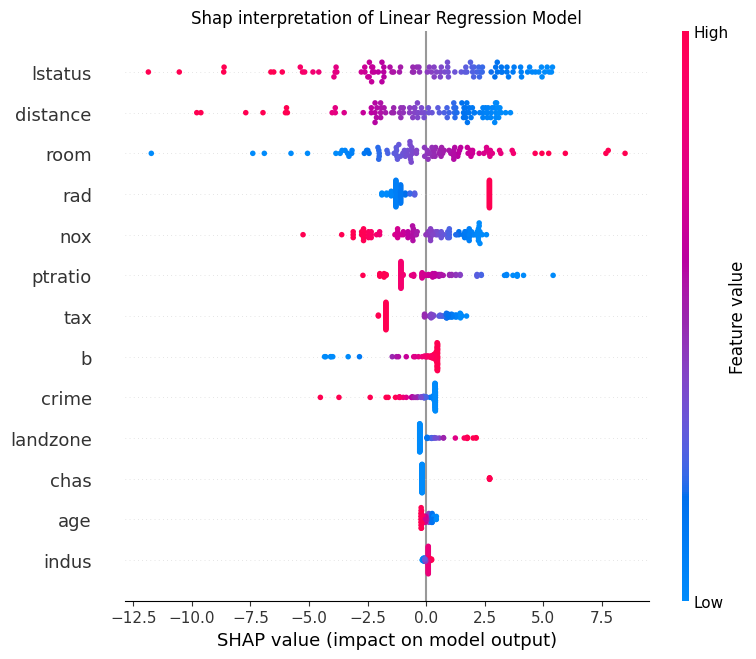

In [38]:
import shap

explainer = shap.Explainer(model_predict, masker=X_test.numpy())

shap_values = explainer.shap_values(X_test.numpy())

plt.title('Shap interpretation of Linear Regression Model')
shap.summary_plot(shap_values, X_test, feature_names=features)
plt.show()

Shap Interpretation of Decison Tree Regressor Model

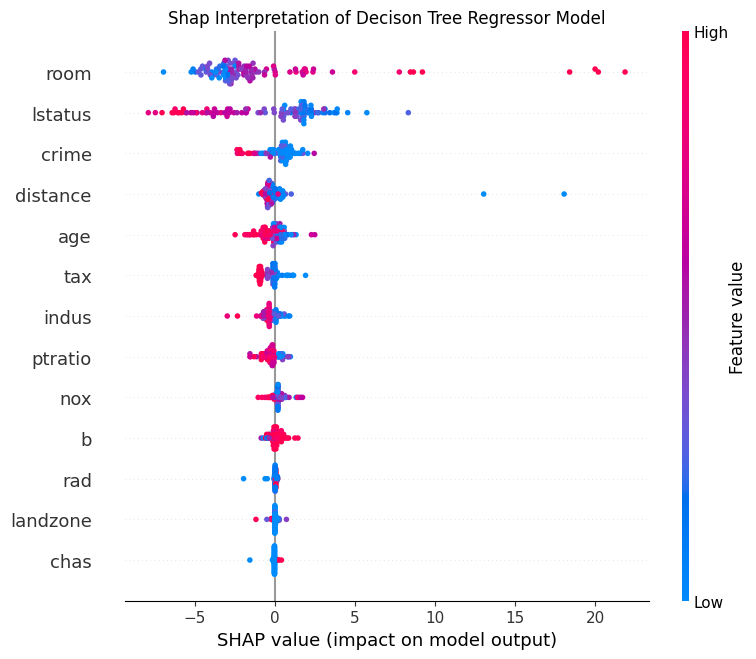

In [39]:
dtr_explainer = shap.TreeExplainer(dtr_model)

dtr_shap_values = dtr_explainer.shap_values(X_test.numpy())

plt.title('Shap Interpretation of Decison Tree Regressor Model')
shap.summary_plot(dtr_shap_values, X_test, feature_names=features)
plt.show()

Shap Interpretation of Random Forest Regressor Model

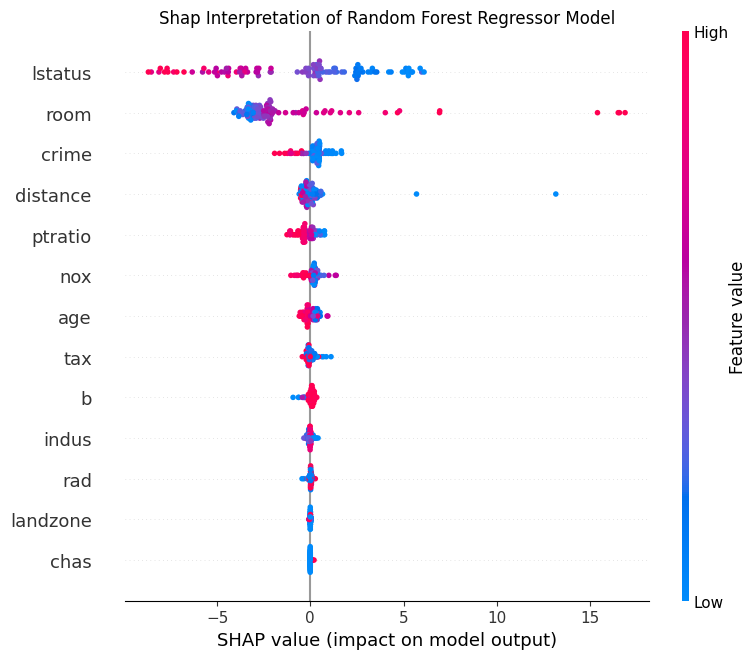

In [40]:

rfr_explainer = shap.TreeExplainer(rfr_model)

rfr_shap_values = rfr_explainer.shap_values(X_test.numpy())

plt.title('Shap Interpretation of Random Forest Regressor Model')
shap.summary_plot(rfr_shap_values, X_test, feature_names=features)
plt.show()

Shap Interpretation of Gradient Boosting Regressor Model

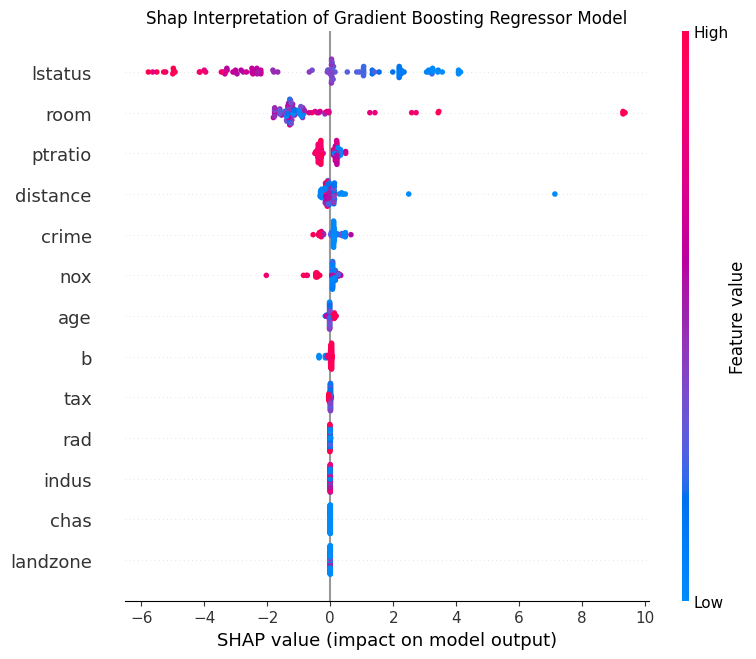

In [41]:

gbr_explainer = shap.TreeExplainer(gbr_model)

gbr_shap_values = gbr_explainer.shap_values(X_test.numpy())

plt.title('Shap Interpretation of Gradient Boosting Regressor Model')
shap.summary_plot(gbr_shap_values, X_test, feature_names=features)
plt.show()